# Computação Evolucionária - TP PSO

## Introdução

## Metodologia

### Função unimodal
A função unimodal escolhida foi a 5 (Different Powers Function)

### Função multimodal
A função multimodal escolhida foi a 10 (Rotated Griewank's Function) 

### Desenvolvimento das funções de avaliação

Inicialmente, é necessário importar as bibliotecas necessárias para o desenvolvimento do trabalho. Está sendo utilizada a versão 3.8.5 do Python, e as bibliotecas `numpy`, `pandas`, `matplotlib` e `seaborn`.

In [1]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d


O proximo passo é implementar e validar a implementação das funções de teste escolhidas para estudo.

In [2]:
class DifferentPowersFunction:
    """
    Função 5 - Different Powers Function
    """
    def __init__(self, o, D=10, f_star=-1000):
        self.o = o
        self.D = D
        self.f_star = f_star

    def func(self, x):
        z = x - self.o
        z_sum = np.sum([(np.abs(z[i])) ** (2 + 4*(i)/(self.D-1)) for i in np.arange(start=0, stop=self.D)])
        return np.sqrt(np.sum(z_sum)) + self.f_star


In [3]:
class RotatedGriewanksFunction:
    """
    Função 10 - Rotated Griewanks's Function
    """
    def __init__(self, o, M1, alpha=100, D=10, f_star=-500):
        self.o = o
        self.D = D
        self.f_star = f_star
        self.M1 = M1
        self.diag = np.diag([alpha ** (i/(2*(D-1))) for i in np.arange(self.D)])

    def calculate_z(self, x):
        return self.diag @ self.M1 @ (6 * (x - self.o))

    def func(self, x):
        z = self.calculate_z(x)
        part1 = np.sum([(z[i]**2)/4000 for i in np.arange(self.D)])
        part2 = -np.prod([np.cos(z[i]/np.sqrt(i+1)) for i in np.arange(self.D)])
        return part1 + part2 + 1 + self.f_star

In [4]:
def plot_function_2d(func, n, bx=[-100, 100], by=[-100,100], title=''):
    """
    Plota a superfície e curvas de níveis para uma função de testes
    """

    lb, ub = bx
    x = np.linspace(lb, ub, n)
    lb, ub = by
    y = np.linspace(lb, ub, n)
    xv, yv = np.meshgrid(x, y)
    z = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            z[i,j] = func(np.array([xv[i,j], yv[i,j]]))

    fig = plt.figure(num=None, figsize=(12, 6))
    fig.suptitle(title)

    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    ax1.plot_surface(xv, yv, z, cmap='jet', edgecolor='none')
    cs = ax2.contour(x,y,z, cmap='jet', levels=50)
    fig.colorbar(cs, ax=ax2)
    plt.show()



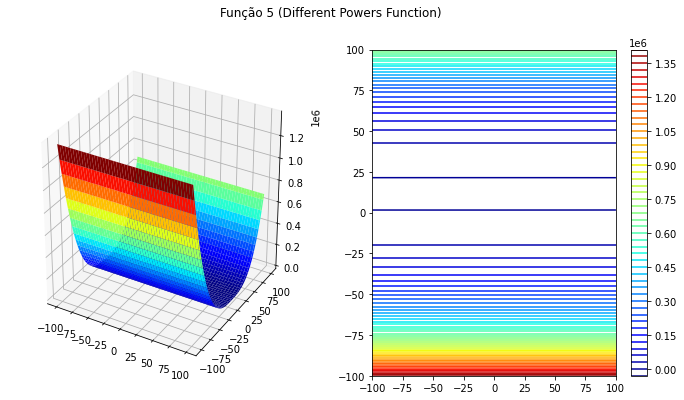

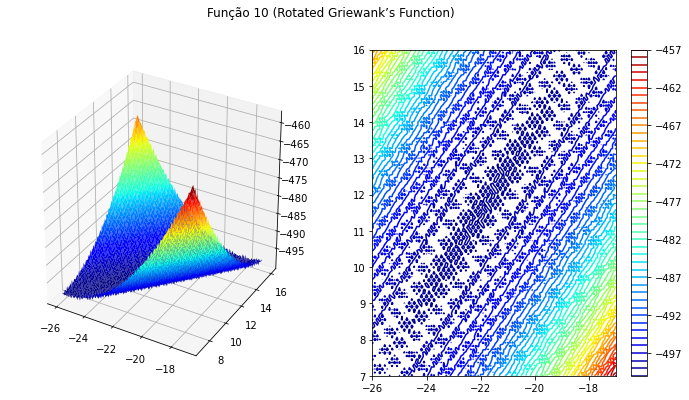

In [5]:
# Ler os dados de shift fornecidos
shift_data = pd.read_fwf('data/shift_data.txt', header=None)
# Ler a matriz para duas dimensões
M_D2 = pd.read_fwf('data/M_D2.txt', header=None)
# número de dimensões para gráficos
D_plot = 2
# selecionar um único valor de shift
o_used = shift_data.iloc[0, :D_plot].to_numpy()
# selecionar duas matrizes de rotação
M1 = M_D2.iloc[:2, :].to_numpy()

unimodal_2d = DifferentPowersFunction(o_used, D=D_plot)
multimodal_2d = RotatedGriewanksFunction(o_used, M1, D=D_plot)

plot_function_2d(unimodal_2d.func, 100, title='Função 5 (Different Powers Function)')
plot_function_2d(multimodal_2d.func, 100, bx=[-26,-17],by=[7,16], title='Função 10 (Rotated Griewank’s Function)')


Através dos gráficos acima, é possível ver que as funções implementadas retornam os mesmos valores exibidos em [1]. Logo, o próximo passo consiste em implementar o algoritmo PSO e executar os experimentos propostos para o trabalho.

### Desenvolvimento do algoritmo PSO

O algoritmo PSO foi desenvolvido em um arquivo separado ``pso.py``. A implementação será validada sobre uma função quadrática simples em duas dimensões para avaliar o seu correto funcionamento. É esperada uma convergência rápida para o mínimo local em $x^* = (0,0)$.


Best particle: [-1.88308312e-05 -3.98485886e-05]
Best cost: 1.9425102184770892e-09


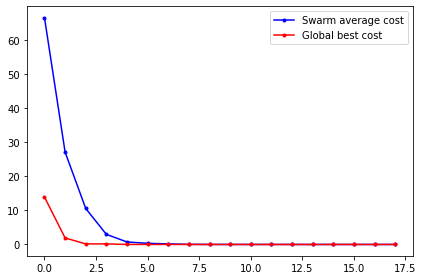

Best particle: [ 0.01847793 -0.01614048]
Best cost: 0.0006019491963147794


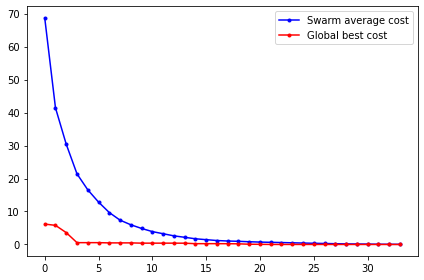

In [6]:
# importar o otimizador
from pso import PSO

# criar instancia da função de teste quadrática
quad_func = lambda x: x[0]**2 + x[1]**2

# Executar o algoritmo
pso_unimodal = PSO(quad_func, [-10,-10] , [10,10], max_feval=1000, swarm_size=30, acceleration=[1.5, 1.5], constrition=0.5, inertia=0.5)
_, _, _, _ = pso_unimodal.run() 

pso_unimodal = PSO(quad_func, [-10,-10] , [10,10], max_feval=1000, swarm_size=30, acceleration=[1.5, 1.5], constrition=0.5, inertia=0.5, topology='lbest')
_, _, _, _ = pso_unimodal.run() 


A partir dos resultados anteriores, é possível constatar que o algoritmo consegue convergir com facilidade para uma funçao simples de teste para as estruturas de vizinhança `gbest` e `lbest`. Dessa forma, é possível considerar sua implementação como validada. 

## Resultados
Inicialmente é necessário importar os dados necessários e definir as variáveis para as instâncias do problema a serem estudadas.

In [11]:
# Ler a matriz M
M_D10 = pd.read_fwf('data/M_D10.txt', header=None)

# Definições padrões para os testes
D = 10
n_executions = 31
max_fevals = 100000
ub = [100]*D
lb = [-100]*D

# selecionar um único valor de shift
o_test = shift_data.iloc[0, :D].to_numpy()
# selecionar matriz de rotação
M1 = M_D10.iloc[:D, :].to_numpy()

Em seguida, basta instanciar um objeto único que representa cada função de avaliação com os dados importados.

In [12]:
# Função unimodal
unimodal = DifferentPowersFunction(o_test, D=D)
# Funcção multimodal
multimodal = RotatedGriewanksFunction(o_test, M1, D=D)

### Efeito dos hiper-parâmetros

Como forma de entender como cada hiper-parâmetro existente afeta o desempenho do algoritmo PSO para cada uma das estruturas de vizinhança, a seguir serão avaliados os parâmetros tamanho da população, coeficientes de aceleração, parâmetro de constrição e peso de inércia. Inicialmente, é definida uma função responsável por executar de forma fácil um experimento variando os hiperparâmetros disponíveis. Será considerado como critério de parada 10000 avaliações da função objetivo, ou uma diferença relativa de 0.1% da melhor solução em relação ao mínimo global da função objetivo.


In [84]:
def run_experiment(func, lb, ub, f_star, constrition = 0.5, inertia = 0.5, n_runs = 31, max_feval=10000, swarm_size=30, acceleration=[1.5, 1.5]):
    data = np.zeros((n_runs, 2))
    data_progress_gbest = []
    data_progress_lbest = []

    for i in range(n_runs):
        pso_lbest = PSO(func, lb, ub, max_feval, swarm_size, acceleration, constrition, inertia, topology='lbest')
        pso_gbest = PSO(func, lb, ub, max_feval, swarm_size, acceleration, constrition, inertia, topology='gbest')

        best_solution_lbest, best_cost_lbest, global_best_lbest, _ = pso_lbest.run(f_star=f_star ,debug=False)
        best_solution_gbest, best_cost_gbest, global_best_gbest, _ = pso_gbest.run(f_star=f_star, debug=False)

        data_progress_gbest.append(np.array(global_best_gbest))
        data_progress_lbest.append(np.array(global_best_lbest))

        data[i,0] = best_cost_lbest
        data[i,1] = best_cost_gbest
    
    results = pd.DataFrame(data, columns=['lbest', 'gbest'])
    results['constrition'] = [constrition] * n_runs
    results['inertia'] = [inertia] * n_runs
    results['swarm_size'] = [swarm_size] * n_runs
    results['acceleration_1'] = [acceleration[0]] * n_runs
    results['acceleration_2'] = [acceleration[1]] * n_runs

    return results, pd.DataFrame(data_progress_gbest).T, pd.DataFrame(data_progress_lbest).T

def plot_experiment_results(gbest, lbest):
    mean_gbest = gbest.apply(np.mean, axis=1)
    mean_lbest = lbest.apply(np.mean, axis=1)
    x_gbest = range(1, mean_gbest.shape[0] + 1)
    x_lbest = range(1, mean_lbest.shape[0] + 1)

    std_gbest = gbest.apply(np.std, axis=1)
    std_lbest = lbest.apply(np.std, axis=1)

    fig, ax = plt.subplots(1, 2, sharey=True)
    ax[0].plot(x_gbest, mean_gbest)
    ax[0].fill_between(x_gbest, mean_gbest + std_gbest, mean_gbest - std_gbest, alpha=0.5)

    ax[1].plot(x_lbest, mean_lbest, 'r')
    ax[1].fill_between(x_lbest, mean_lbest + std_lbest, mean_lbest - std_lbest, alpha=0.5, color='red')


#### 1) Tamanho da população

Para este experimento, serão consideradas populações de tamanho 10, 30, 50 e 100. Os demais parâmetros serão mantidos fixos em seus valores padrão.

In [91]:
exp_pop10_uni = run_experiment(unimodal.func, lb, ub, swarm_size=10, f_star= unimodal.f_star)
exp_pop30_uni = run_experiment(unimodal.func, lb, ub, swarm_size=30, f_star= unimodal.f_star)
exp_pop50_uni = run_experiment(unimodal.func, lb, ub, swarm_size=50, f_star= unimodal.f_star)
exp_pop100_uni = run_experiment(unimodal.func, lb, ub, swarm_size=100, f_star= unimodal.f_star)

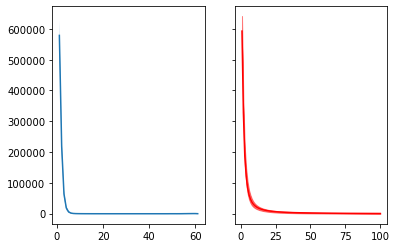

In [92]:
plot_experiment_results(exp_pop100_uni[1], exp_pop100_uni[2])

In [15]:
all_data_unimodal = pd.concat([exp_pop10_uni[0], exp_pop30_uni[0], exp_pop50_uni[0], exp_pop100_uni[0]], ignore_index=True)
stats_unimodal = all_data_unimodal.groupby(['swarm_size'])[['lbest', 'gbest']].aggregate([np.mean, np.std])
display(stats_unimodal)

lbest                      gbest              
                    mean           std         mean           std
swarm_size                                                       
10          11339.104152  13520.686359  9366.349170  10463.062542
30           2091.639072   2434.619370  1513.956169   2132.076560
50            490.240420    824.250732  1051.786559   1879.009129
100           178.743036    476.997174  -220.570799    337.011816

In [16]:
exp_pop10_mul = run_experiment(multimodal.func, lb, ub, swarm_size=10, f_star= multimodal.f_star)
exp_pop30_mul = run_experiment(multimodal.func, lb, ub, swarm_size=30, f_star= multimodal.f_star)
exp_pop50_mul = run_experiment(multimodal.func, lb, ub, swarm_size=50, f_star= multimodal.f_star)
exp_pop100_mul = run_experiment(multimodal.func, lb, ub, swarm_size=100, f_star= multimodal.f_star)

In [17]:
all_data_multimodal = pd.concat([exp_pop10_mul[0], exp_pop30_mul[0], exp_pop50_mul[0], exp_pop100_mul[0]], ignore_index=True)
stats_multimodal = all_data_multimodal.groupby(['swarm_size'])[['lbest', 'gbest']].aggregate([np.mean, np.std])
display(stats_multimodal)

lbest                   gbest            
                  mean         std        mean         std
swarm_size                                                
10          409.717324  527.033454  512.850890  411.805006
30         -226.216766  143.167626  -16.967824  277.400374
50         -341.964152   97.014512 -143.693795  207.092100
100        -339.980043   75.784161 -362.816346   77.357999


#### 1) Coeficientes de aceleração


#### 1) Parâmetro de constrição


#### 1) Peso de inércia

## Resultados

In [ ]:
exp_1 = run_experiment(multimodal.func, lb, ub, constrition=1, inertia=1, f_star= multimodal.f_star)
exp_2 = run_experiment(multimodal.func, lb, ub, constrition=1, inertia=0.5, f_star=multimodal.f_star)
exp_3 = run_experiment(multimodal.func, lb, ub, constrition=0.5, inertia=1, f_star=multimodal.f_star)
exp_4 = run_experiment(multimodal.func, lb, ub, constrition=0.5, inertia=0.5, f_star=multimodal.f_star)

In [ ]:
exp_5 = run_experiment(unimodal.func, lb, ub, constrition=1, inertia=1, f_star= unimodal.f_star)
exp_6 = run_experiment(unimodal.func, lb, ub, constrition=1, inertia=0.5, f_star= unimodal.f_star)
exp_7 = run_experiment(unimodal.func, lb, ub, constrition=0.5, inertia=1, f_star= unimodal.f_star)
exp_8 = run_experiment(unimodal.func, lb, ub, constrition=0.5, inertia=0.5, f_star= unimodal.f_star)

In [ ]:
all_data_unimodal = pd.concat([exp_5, exp_6, exp_7, exp_8], ignore_index=True)
stats_unimodal = all_data_unimodal.groupby(['constrition','inertia']).aggregate([np.mean, np.std])
display(stats_unimodal)

In [ ]:
all_data_multimodal = pd.concat([exp_1, exp_2, exp_3, exp_4], ignore_index=True)
stats_multimodal = all_data_multimodal.groupby(['constrition','inertia']).aggregate([np.mean, np.std])
display(stats_multimodal)

## Conclusão

## Referências

[[1]] J. J. Liang, B-Y. Qu, P. N. Suganthan, Alfredo G. Hern´andez-D´ıaz, "Problem Definitions and Evaluation
Criteria for the CEC 2013 Special Session and Competition on Real-Parameter Optimization", Technical Report 201212, Computational Intelligence Laboratory, Zhengzhou University, Zhengzhou China and
Technical Report, Nanyang Technological University, Singapore, January 2013.